In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 

In [2]:
d1 = np.loadtxt("../data/1D/histograms/example_1.txt")
d2 = np.loadtxt("../data/1D/histograms/example_2.txt")
print(d1.shape, d2.shape)

(500,) (500,)


# Histogram Plots 

Text(0, 0.5, 'Counts')

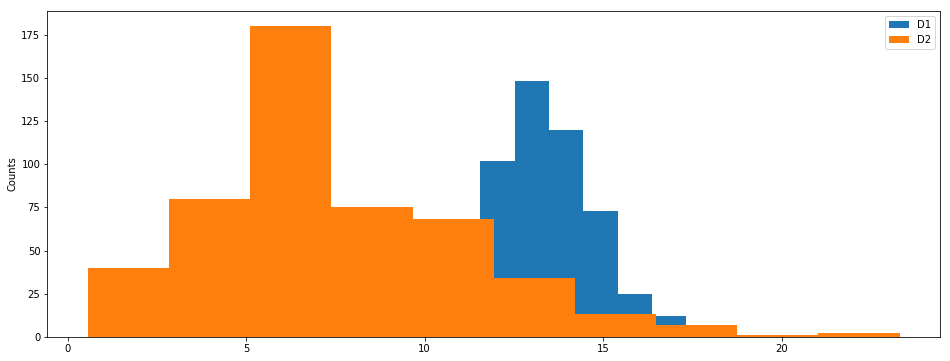

In [5]:
plt.figure(figsize=(16, 6))
plt.hist(d1, label="D1", bins=10)
plt.hist(d2, label="D2", bins=10)
plt.legend()
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

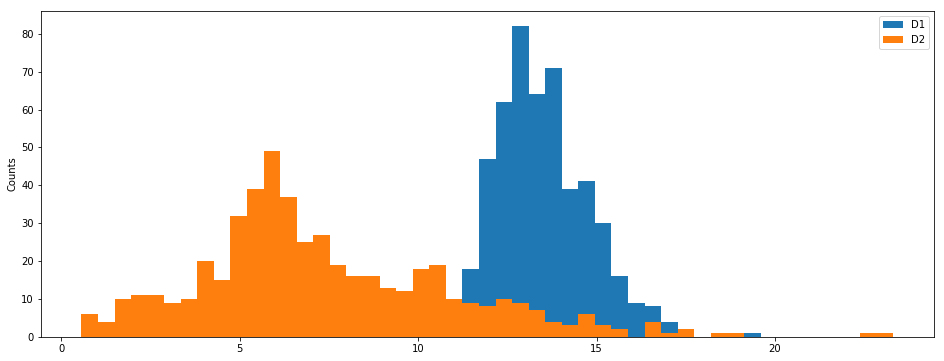

In [6]:
plt.figure(figsize=(16, 6))
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
counts1, _, _ = plt.hist(d1, bins=bins, label="D1")
plt.hist(d2, bins=bins, label="D2")
plt.legend()
plt.ylabel("Counts")

Text(0, 0.5, 'Probability')

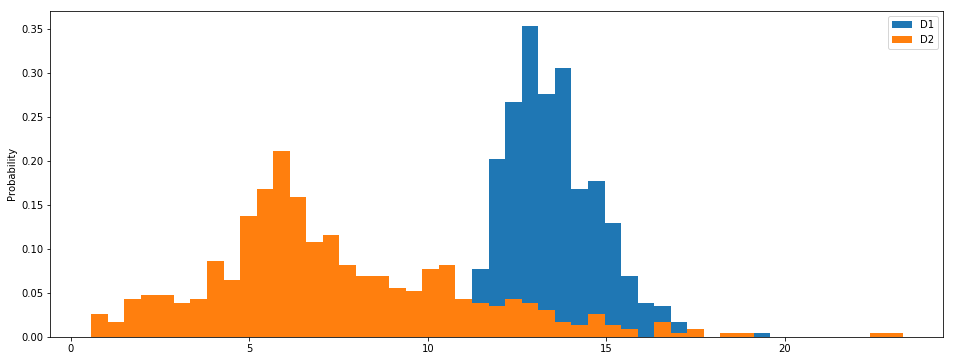

In [8]:
plt.figure(figsize=(16, 6))
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
counts1, _, _ = plt.hist(d1, bins=bins, label="D1", density=True)
plt.hist(d2, bins=bins, label="D2", density=True)
plt.legend()
plt.ylabel("Probability")

Text(0, 0.5, 'Probability')

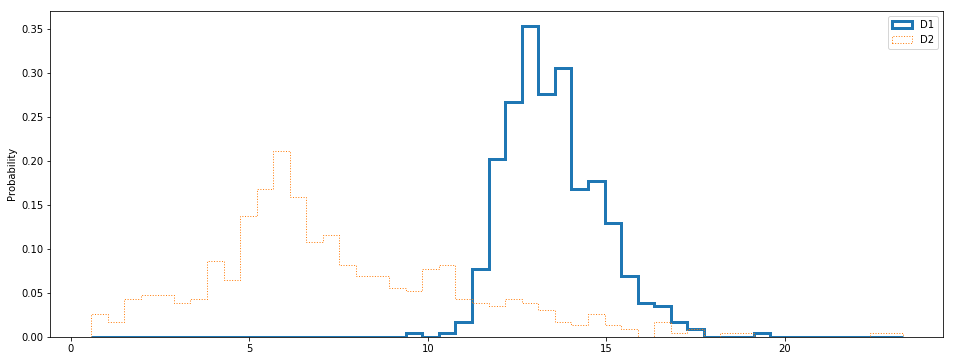

In [9]:
plt.figure(figsize=(16, 6))
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
counts1, _, _ = plt.hist(d1, bins=bins, label="D1", density=True, histtype="step", lw=3)
plt.hist(d2, bins=bins, label="D2", density=True, histtype="step", ls=":")
plt.legend()
plt.ylabel("Probability")

Text(0, 0.5, 'Probability')

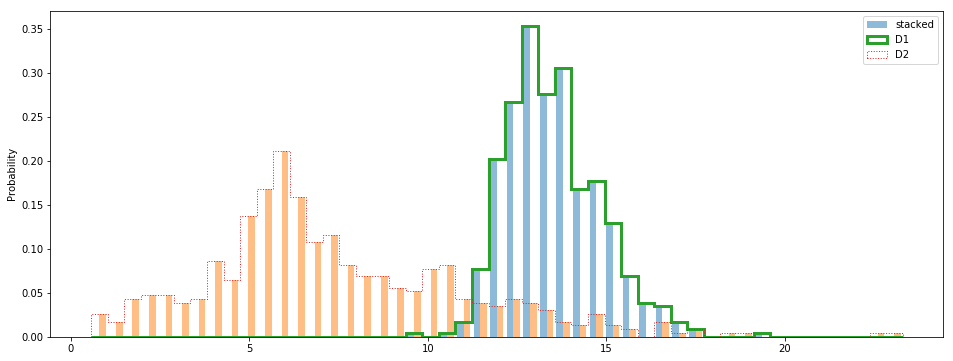

In [10]:
plt.figure(figsize=(16, 6))
bins = np.linspace(min(d1.min(), d2.min()), max(d1.max(), d2.max()), 50)
plt.hist([d1, d2], bins=bins, label="stacked", density=True, alpha=0.5)
plt.hist(d1, bins=bins, label="D1", density=True, histtype="step", lw=3)
plt.hist(d2, bins=bins, label="D2", density=True, histtype="step", ls=":")
plt.legend()
plt.ylabel("Probability")

# BeeSwarm Plots

In [14]:
dataset = pd.DataFrame({
    "value":np.concatenate((d1, d2)), 
    "type":np.concatenate((np.ones(d1.shape), np.zeros(d2.shape)))
})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
value    1000 non-null float64
type     1000 non-null float64
dtypes: float64(2)
memory usage: 15.7 KB


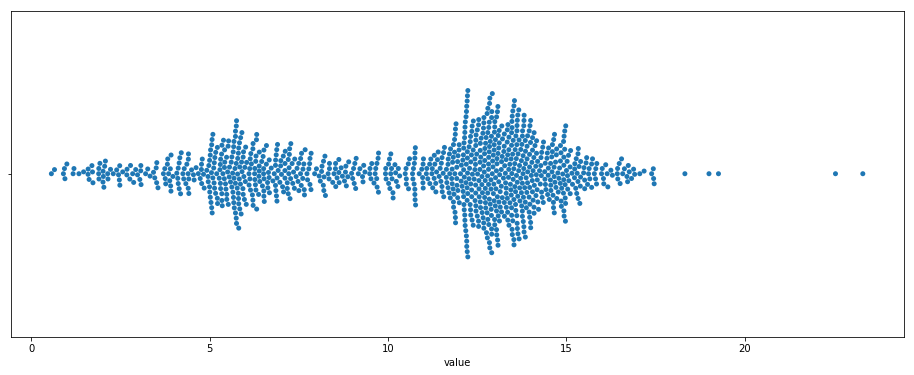

In [16]:
plt.figure(figsize=(16, 6))
sns.swarmplot(dataset["value"])

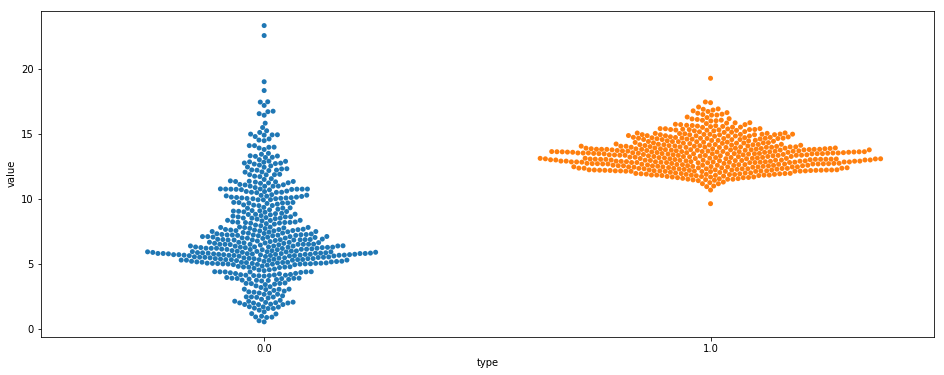

In [17]:
plt.figure(figsize=(16, 6))
sns.swarmplot(x="type", y="value", data=dataset)

# Box Plots

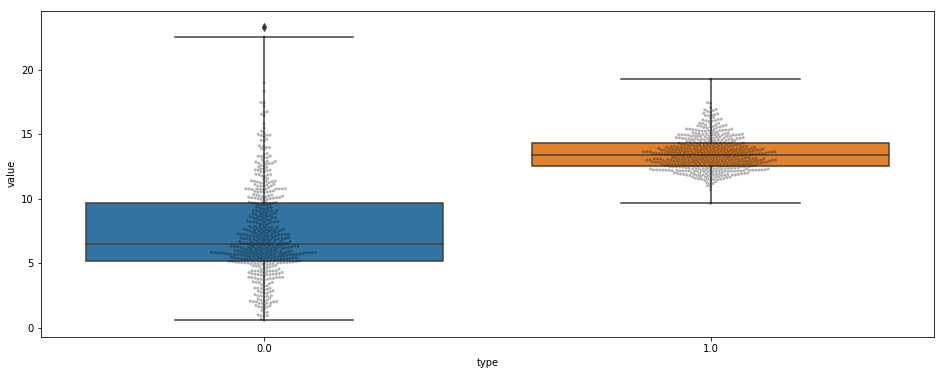

In [23]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="type", y="value", data=dataset, whis=3.0)
sns.swarmplot(x="type", y="value", data=dataset, size=3, color="k", alpha=0.3)

# Violine Plot

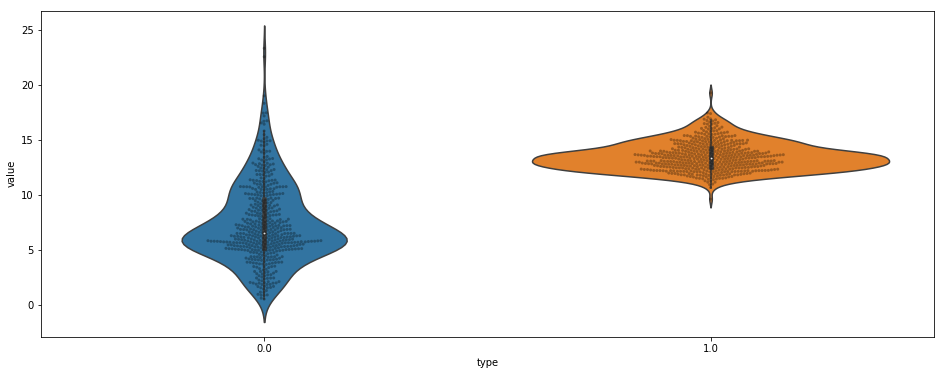

In [25]:
plt.figure(figsize=(16, 6))
sns.violinplot(x="type", y="value", data=dataset)
sns.swarmplot(x="type", y="value", data=dataset, size=3, color="k", alpha=0.3)

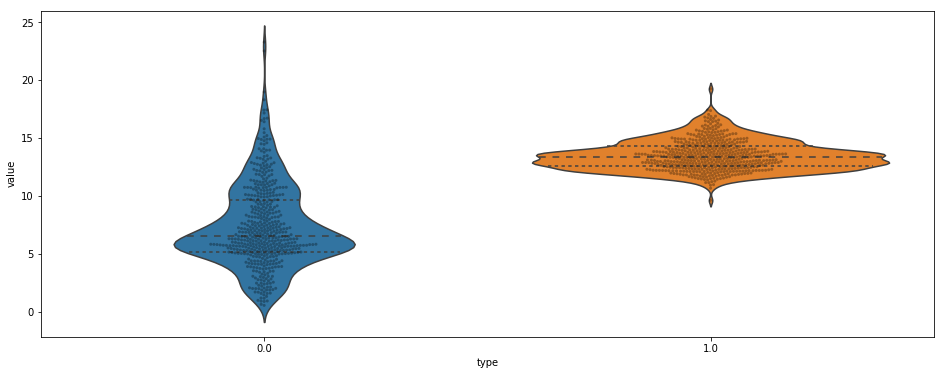

In [28]:
plt.figure(figsize=(16, 6))
sns.violinplot(x="type", y="value", data=dataset, inner="quartile", bw=0.2)
sns.swarmplot(x="type", y="value", data=dataset, size=3, color="k", alpha=0.3)

# Empirical Cumilative Distribution Functions

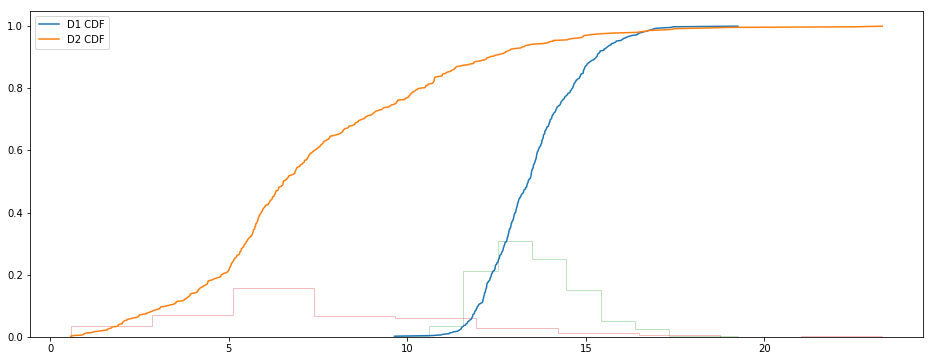

In [31]:
sd1 = np.sort(d1)
sd2 = np.sort(d2)
cdf = np.linspace(1/d1.size, 1, d1.size)

plt.figure(figsize=(16, 6))
plt.plot(sd1, cdf, label="D1 CDF")
plt.plot(sd2, cdf, label="D2 CDF")
plt.hist(d1, histtype="step", density=True, alpha=0.3)
plt.hist(d2, histtype="step", density=True, alpha=0.3)
plt.legend()

# Describe

In [33]:
df = pd.DataFrame({"Data1":d1, "Data2":d2})
df.describe()

,Data1,Data2
count,500.000000,500.000000
mean,13.511172,7.390714
std,1.296363,3.589993
min,9.640000,0.568000
25%,12.572000,5.164750
50%,13.389500,6.531000
75%,14.291250,9.664500
max,19.262000,23.307000
